<a href="https://colab.research.google.com/github/faridamousa23/Level-3-Advanced-/blob/main/Natural_Language_Processing_(NLP)_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              review  \
0  I love this product! It’s amazing and works pe...   
1       Worst experience ever. Totally disappointed.   
2                      It was okay, nothing special.   
3      Excellent customer service and great quality.   
4   The delivery was late and packaging was damaged.   

                               cleaned_review sentiment  
0         love product amazing work perfectly  Positive  
1  worst experience ever totally disappointed  Negative  
2                        okay nothing special  Positive  
3    excellent customer service great quality  Positive  
4             delivery late packaging damaged  Negative  


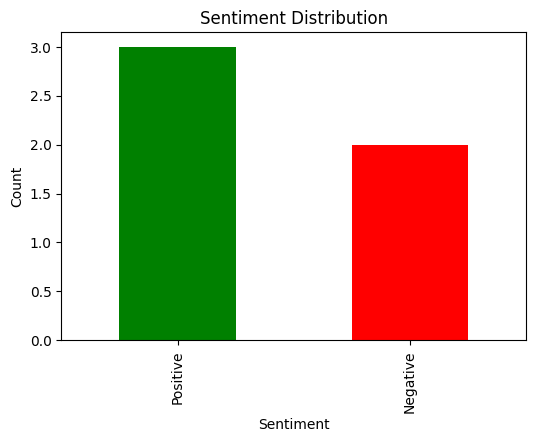

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt_tab")


data = {
    "review": [
        "I love this product! It’s amazing and works perfectly.",
        "Worst experience ever. Totally disappointed.",
        "It was okay, nothing special.",
        "Excellent customer service and great quality.",
        "The delivery was late and packaging was damaged."
    ]
}
df = pd.DataFrame(data)


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if w not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)


df["cleaned_review"] = df["review"].apply(preprocess_text)


def get_sentiment(text):
    analysis = TextBlob(text).sentiment.polarity
    if analysis > 0:
        return "Positive"
    elif analysis < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)

print(df)


sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()




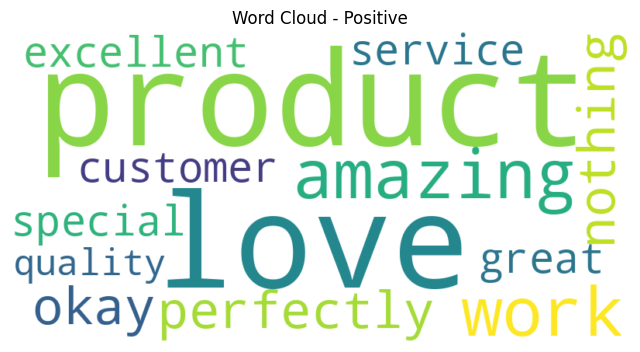

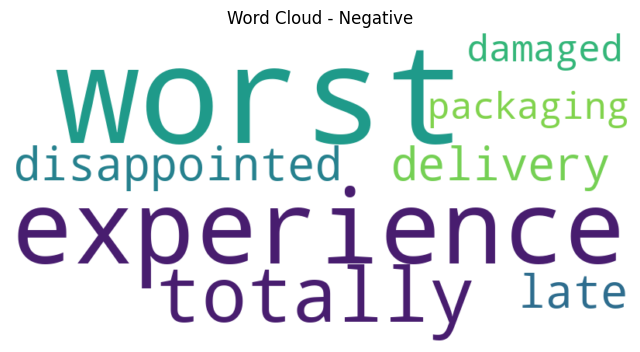

In [5]:
for sentiment in df["sentiment"].unique():
    text = " ".join(df[df["sentiment"] == sentiment]["cleaned_review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment}")
    plt.show()